In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True

In [2]:
#### Merging 12 months of data into a single file 

In [10]:
# 1st and more tedious way
jan = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_January_2019.csv')
feb = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_February_2019.csv')
mar = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_March_2019.csv')
apr = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_April_2019.csv')
may = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_May_2019.csv')
june = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_June_2019.csv')
july = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_July_2019.csv')
aug = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_August_2019.csv')
sep = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_September_2019.csv')
oct = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_October_2019.csv')
nov = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_November_2019.csv')
dec = pd.read_csv(r'C:\Users\Ng Zheng Chong\Projects\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_December_2019.csv')
allmonths = [jan, feb, mar, apr, may, june, july, aug, sep, oct, nov, dec]
pd.concat(allmonths)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [3]:
# 2nd and more efficient way
allm = [] 
for filename in os.listdir('./Sales_Data'):
    table = pd.read_csv('./Sales_Data/'+filename)
    allm.append(table)

data = pd.concat(allm)
clean_data = data.dropna()


In [50]:
# Super long way that is still wrong
for index, row in data.iterrows():
    if row['Quantity Ordered'] == "Quantity Ordered" or 'NaN':
        data.drop(index=index)

data['Profit'] = data['Quantity Ordered'].dropna().astype(int) * data['Price Each']
data['Month'] = data['Month'].dt.month


KeyboardInterrupt: 

In [15]:
# How many rows are considered invalid
print(clean_data['Quantity Ordered'].value_counts())
print('Number of null values:', clean_data['Quantity Ordered'].isna().sum())

# Cleaning data efficiently

clean_data.loc[:, 'Quantity Ordered'] = clean_data['Quantity Ordered'].replace(['Quantity Ordered'], False)
clean_data.loc[:, 'Price Each'] = clean_data['Price Each'].replace(['Price Each'], False)
clean_data.loc[:, 'Order Date'] = clean_data['Order Date'].replace(['Order Date'], False)
clean_data['Quantity Ordered'].dropna()

# Create Profits = Quantity * Price Column
clean_data['Profits'] = clean_data['Quantity Ordered'].astype(float) * clean_data['Price Each'].astype(float)

# Create month column
month = []
for timeframe in clean_data['Order Date']:
    if timeframe == False:
        month.append(False)
    else:
        month.append(dt.strptime(timeframe, '%m/%d/%y %H:%M').strftime('%m'))    
clean_data['Month'] = month

# Create city column
clean_data['City'] = clean_data['Purchase Address'].str.split(',').str[1] + ' ' + clean_data['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]
clean_data

Quantity Ordered
1        168552
2         13324
3          2920
4           806
False       355
5           236
6            80
7            24
8             5
9             3
Name: count, dtype: int64
Number of null values: 0


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Profits,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,09,Los Angeles CA
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,09,San Francisco CA
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,09,San Francisco CA
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,09,San Francisco CA


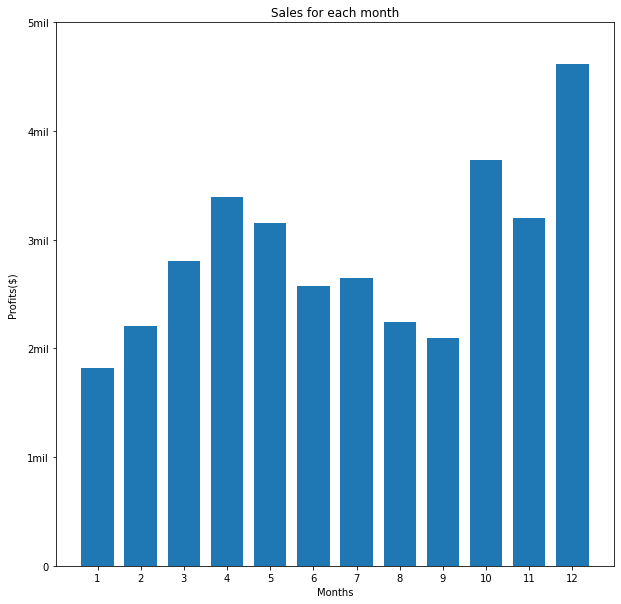

Profits for the month: $4613443.34
Month: December


In [176]:
#### Q1. What is the best month for sales? How much was earned that month?
mostprofits = clean_data.loc[:, ['Month', 'Profits']]
mostprofits = mostprofits[mostprofits != False].groupby('Month').sum() 

plt.figure(1, figsize=(10,10))
plt.bar(range(1,13), mostprofits['Profits'], width=0.75)
plt.title('Sales for each month')
plt.ylabel('Profits($)', labelpad=10.0)
plt.yticks(np.arange(0, 6000000, 1000000), labels=['0', '1mil', '2mil', '3mil', '4mil', '5mil'])
plt.xlabel('Months')
plt.xticks(range(1,13))
plt.show()  

print("Profits for the month: ${}".format(mostprofits['Profits'].max()))
print("Month: December") 

KeyboardInterrupt: 

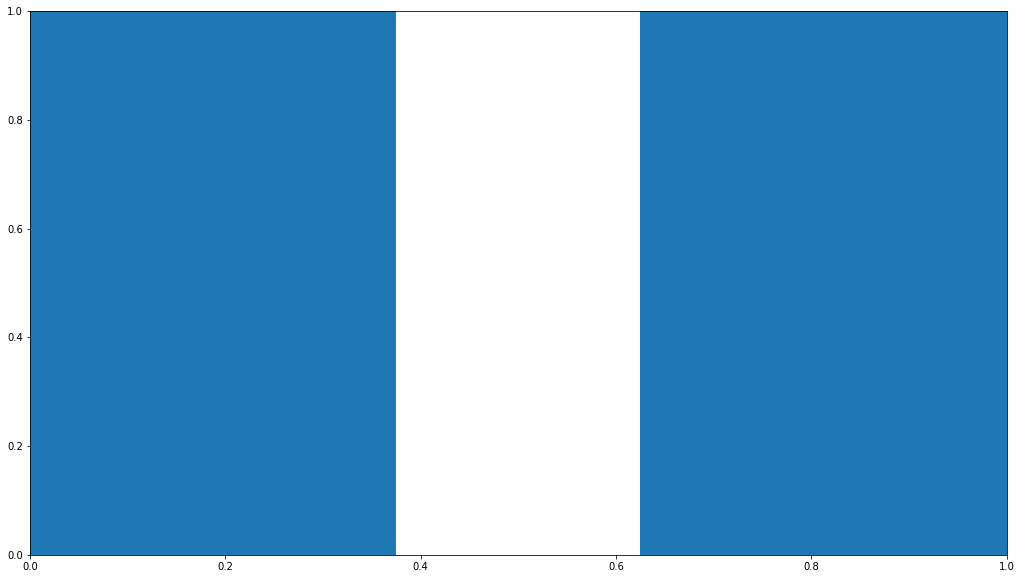

In [44]:
#### Q2. Which city has the highest number of sales
salesincity = clean_data[['City', 'Profits']].groupby('City').sum()
salesincity = salesincity[salesincity.index != False]

cities = ['Atlanta GA', 'Austin TX', 'Boston MA', 'Dallas TX', 'Los Angelas CA', 'New York City NY', 'Portland ME', 'Portland OR', 'San Francisco CA', 'Seattle WA']
cities = [city for city, df in salesincity.groupby('City')]
plt.figure(2, figsize=(17.5,10))
plt.bar(np.arange(0, len(salesincity.index)), salesincity['Profits'], width=0.75)
plt.title('Sales in each city')
plt.xlabel('Cities', labelpad=10.0)
plt.xticks(np.arange(0, len(salesincity.index)), labels=cities)
plt.ylabel('Sales($)', labelpad=10.0)
plt.yticks(np.arange(0, 10000000, 1000000), labels=['0', '1mil', '2mil', '3mil', '4mil', '5mil', '6mil', '7mil', '8mil', '9mil'])
plt.show()

print("City with the highest sales: San Francisco CA")